# 1. Подготовка данных:

In [138]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [205]:
# Read CSV train data file into FataFrame
train_df = pd.read_csv("train.csv")

# Read CSV test data file into FataFrame
test_df = pd.read_csv("test.csv")

# preview train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Проверка данных: Изучите структуру данных, проверьте на наличие пропусков и аномалий:

In [12]:
train_df.info()
train_df.describe()
train_df.isnull().sum()  # Проbверка на пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Обработка пропусков: В колонке Age могут быть пропуски. Например, их можно заполнить медианным значением.

In [16]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

##### Колонку Cabin можно удалить, так как много пропусков, либо попробовать выделить из нее важные паттерны. В колонке Embarked также могут быть пропуски, их можно заменить на наиболее частое значение:

In [84]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

##### Преобразование категориальных переменных: Преобразуйте категориальные переменные в числовые значения с помощью pd.get_dummies() или LabelEncoder.

##### Масштабирование данных: Признаки, такие как Fare и Age, можно нормализовать, чтобы улучшить работу моделей, чувствительных к масштабу данных (например, логистическая регрессия):

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df[['Fare', 'Age']] = scaler.fit_transform(train_df[['Fare', 'Age']])

##### Разделение на тренировочную и тестовую выборки: Если не используете отдельный тестовый набор Kaggle, можно разделить данные:

In [110]:
from sklearn.model_selection import train_test_split
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 2. Исследовательский анализ данных (EDA):

##### Анализ распределений: Постройте графики для визуализации данных.

<Axes: xlabel='Survived', ylabel='count'>

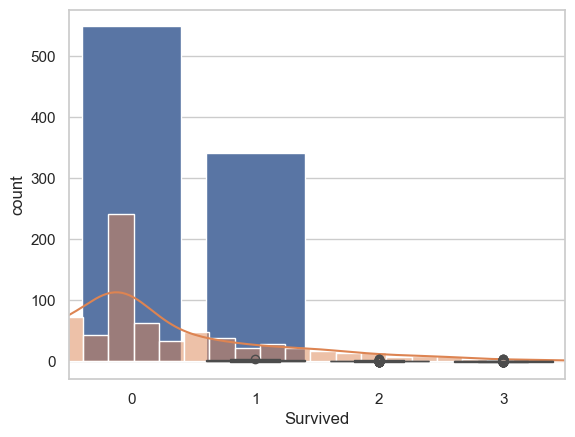

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=train_df)  # Распределение выживших
sns.histplot(train_df['Age'], kde=True)  # Распределение возраста
sns.boxplot(x='Pclass', y='Age', data=train_df)  # Влияние класса на возраст

##### Удаление ненужных признаков: Некоторые текстовые признаки, такие как Name, не нужны для построения модели. Их можно просто удалить перед построением корреляционной матрицы:

In [170]:
data_cleaned = train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

##### Преобразование категориальных переменных: Убедитесь, что все категориальные переменные (такие как Sex, Embarked) преобразованы в числовые с помощью one-hot encoding или label encoding. Например, вы уже должны были преобразовать эти переменные:

In [177]:
data_cleaned = pd.get_dummies(data_cleaned, columns=['Sex', 'Embarked'], drop_first=True)

##### Проверка типов данных: Проверьте, что после преобразований все признаки являются числовыми:

In [189]:
print(data_cleaned.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Sex_male          bool
Embarked_Q        bool
Embarked_S        bool
dtype: object


##### Корреляционная матрица: После очистки данных от текстовых признаков можно снова построить корреляционную матрицу:

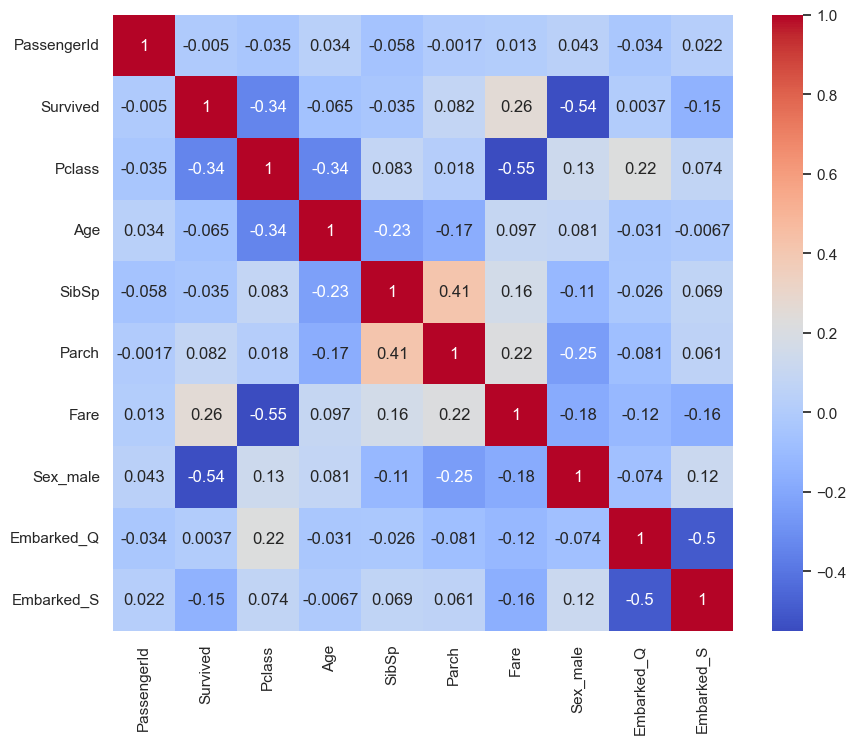

In [209]:
corr_matrix = data_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

##### Корреляция признаков: Постройте корреляционную матрицу:

In [234]:
# Удаляем текстовые столбцы
X_train_cleaned = X_train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
X_test_cleaned = X_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Преобразуем категориальные переменные в числовые
X_train_cleaned = pd.get_dummies(X_train_cleaned, columns=['Sex', 'Embarked'], drop_first=True)
X_test_cleaned = pd.get_dummies(X_test_cleaned, columns=['Sex', 'Embarked'], drop_first=True)

# Масштабируем числовые данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_cleaned[['Age', 'Fare']] = scaler.fit_transform(X_train_cleaned[['Age', 'Fare']])
X_test_cleaned[['Age', 'Fare']] = scaler.transform(X_test_cleaned[['Age', 'Fare']])

# Обучаем модель логистической регрессии
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_cleaned, y_train)

LogisticRegression()

## 3. Обучение моделей:

##### Дерево решений:

In [265]:
# Удаляем текстовые столбцы
X_train_cleaned = X_train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
X_test_cleaned = X_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Преобразуем категориальные переменные в числовые
X_train_cleaned = pd.get_dummies(X_train_cleaned, columns=['Sex', 'Embarked'], drop_first=True)
X_test_cleaned = pd.get_dummies(X_test_cleaned, columns=['Sex', 'Embarked'], drop_first=True)

# Проверяем типы данных
print(X_train_cleaned.dtypes)  # Все столбцы должны быть числовыми

# Обучаем модель дерева решений
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_cleaned, y_train)

# Предсказание
y_pred = tree_model.predict(X_test_cleaned)


PassengerId      int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Sex_male          bool
Embarked_Q        bool
Embarked_S        bool
dtype: object


##### Оценка моделей: Используйте метрики для оценки качества: